In [1]:
import pandas as pd 
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import folium
from folium.plugins import MarkerCluster

## Carga de data

### business

In [2]:
business_columns = ['business_id','name','state','latitude','longitude','stars', 'review_count', 'is_open']
business = pd.read_csv('../../data/yelp/business.csv.gz',usecols=business_columns,compression='gzip')
business.drop_duplicates(inplace=True)

In [3]:
business.columns


Index(['business_id', 'name', 'state', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open'],
      dtype='object')

In [4]:
business.head(3)

,business_id,name,state,latitude,longitude,stars,review_count,is_open
0,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,AZ,36.269593,-87.058943,2.0,6,1
1,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,MO,36.208102,-86.768170,1.5,10,1
2,knQ4vIgx-r85kjlWVVjcpQ,Silver and Blue Outfitters,PA,39.476518,-119.784037,4.5,5,1


### Users

**nota**
- Nos damos cuenta que la columna review_count, es el número de reseñas que se realizo a cualquier negocio, no necesariamente a negocios de comida rapida.
- A continuación eliminaremos los duplicados para poder realizar las graficas de los datos.

In [5]:
users_columns = ['user_id', 'date_create_user','name', 'review_count']
users = pd.read_csv('../../data/yelp/users.csv.gz',usecols=users_columns,compression='gzip')
users.drop_duplicates(inplace=True)

In [6]:
users

,user_id,name,review_count,date_create_user
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009
2,SgiBkhXeqIKl1PlFpZOycQ,Eugene,682,2006
3,QF1Kuhs8iwLWANNZxebTow,Catherine,607,2009
4,1L3O2CUTk27SnmqyPBWQdQ,Helen,38,2010
...,...,...,...,...
149985,t90vh4t8L7_OIUE9y69yLQ,Elle,1,2017
149986,dtSCTGRnGS9KLGsb3z_aRQ,Romylis,1,2019
149987,ozt74kgHAsbxIezXi7U1XA,Rishit,1,2015
149988,tQMzSqve7UyY_GOAUkMjLQ,Terry,2,2014


### Reviews

In [7]:
reviews_columns = ['review_id', 'user_id', 'business_id','año', 'stars', 'useful','funny','cool']
reviews = pd.read_csv('../../data/yelp/reviews.csv.gz',usecols=reviews_columns,compression='gzip')

reviews.drop_duplicates(inplace=True)

In [8]:
reviews

,review_id,user_id,business_id,stars,useful,funny,cool,año
0,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,2017
1,PDHRlnEdkEcwATry4w71PQ,UsBxLh14sUpO8SdeqIiGOA,Wy8Hswf2cLQGRZN6armkag,1,1,0,0,2011
2,onlgwy5qGDEzddsrnIvtWg,pYXeL0RCqus2IfhthYCOyA,W7NxQw8UYFR0HLPrI08tvw,4,0,0,0,2012
3,9IG9eB3K-RdIonPBuZ0psw,t2IL-HIXQKd6iZ6cIY8kcg,jOOOrH5n2ijnsZKxzPSAiw,5,0,0,0,2016
4,LO2C_mywzQy5BvdEeONR1A,jvURGq9nyZkTF1KuSaZC_g,CYwC5OjwCN6ib_AQDxi3Ow,5,0,0,0,2016
...,...,...,...,...,...,...,...,...
231776,ZgMFhqwQze4gLJJqUevgqg,eE5cGP32rTKr8IiBLSYevw,aK6R2akvIK9ijw3FvDy8vw,1,0,0,0,2018
231777,1ShPBvmfhhFIqMUI_NZi9A,34vtVo9AoCUr_w6CEcQ_Bg,QnHd7ZdlpLDl5BqEFeiIBg,5,1,0,0,2021
231778,ZumvJCSs0l6XixIzSK-V0w,L0RgciChknpMBXu78nRW1g,lw6OXWUzcwtTzbdh4b0a6g,5,0,0,0,2012
231779,MVg4YUQeEhCA7Z7RsBJSVg,7-7A0Avj47slLGV7yBFc8w,ytynqOUb3hjKeJfRj5Tshw,3,1,0,0,2013


### Merge data

In [9]:
data = reviews.merge(business,on='business_id').merge(users,on='user_id')

nombres = {'stars_x': 'stars_business','stars_y':'stars_users',
 'review_count_x':'review_count_business',
 'review_count_y':'review_count_users',
 'name_x':'name_business','name_y':'name_users'}

data.rename(columns=nombres,inplace=True)

In [10]:
data.columns

Index(['review_id', 'user_id', 'business_id', 'stars_business', 'useful',
       'funny', 'cool', 'año', 'name_business', 'state', 'latitude',
       'longitude', 'stars_users', 'review_count_business', 'is_open',
       'name_users', 'review_count_users', 'date_create_user'],
      dtype='object')

In [11]:
data.head(1)

,review_id,user_id,business_id,stars_business,useful,funny,cool,año,name_business,state,latitude,longitude,stars_users,review_count_business,is_open,name_users,review_count_users,date_create_user
0,YbMyvlDA2W3Py5lTz8VK-A,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,2017,The Original Habit Burger Grill,PA,34.43557,-119.824706,4.0,329,1,Heidi,922,2010


## Analisis Exploratorio

**Cantidad de reviews por calificación del negocio y usuario**

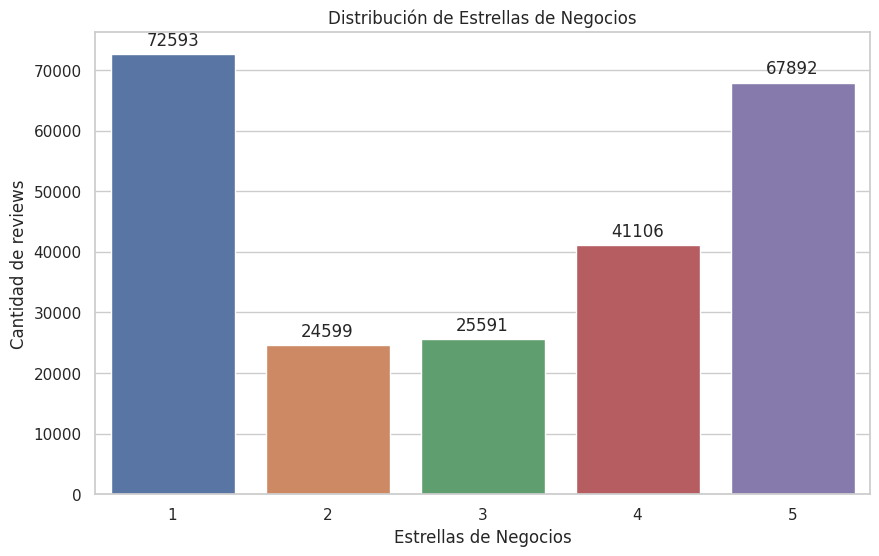

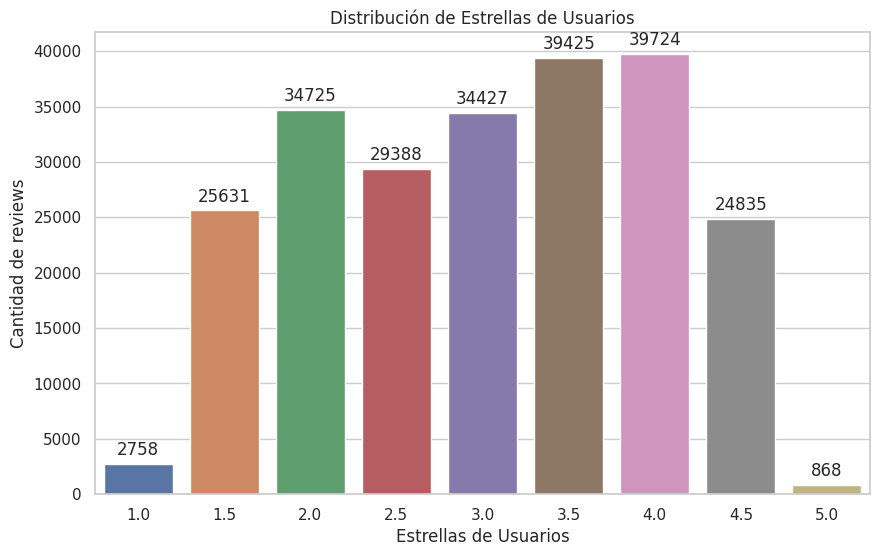

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para la distribución de estrellas de negocios
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='stars_business', data=data)
plt.title('Distribución de Estrellas de Negocios')
plt.xlabel('Estrellas de Negocios')
plt.ylabel('Cantidad de reviews')

# Agregar valores de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

# Gráfico de barras para la distribución de estrellas de usuarios
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='stars_users', data=data)
plt.title('Distribución de Estrellas de Usuarios')
plt.xlabel('Estrellas de Usuarios')
plt.ylabel('Cantidad de reviews')

# Agregar valores de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


**cantidad de reviews por estado**

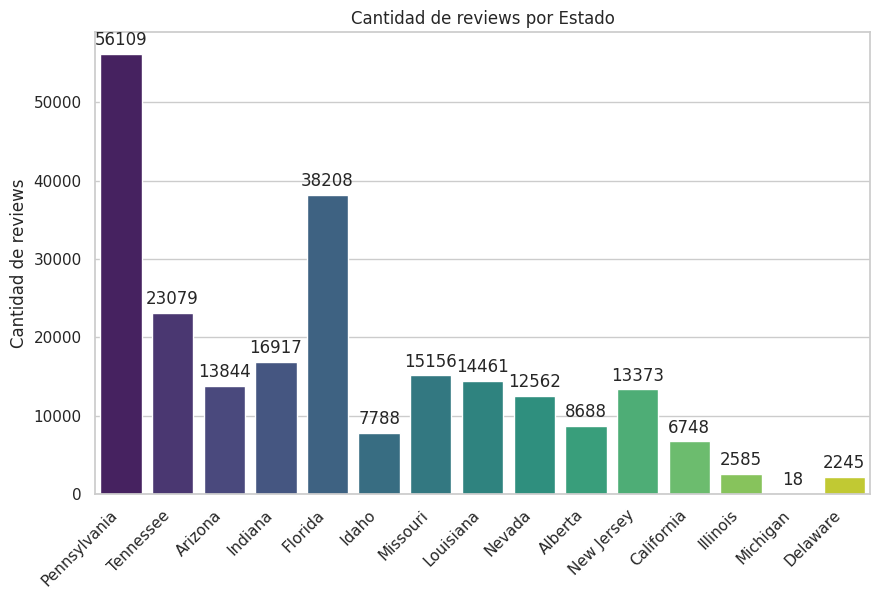

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

estados = {
    'PA': 'Pennsylvania',
    'TN': 'Tennessee',
    'AZ': 'Arizona',
    'IN': 'Indiana',
    'FL': 'Florida',
    'ID': 'Idaho',
    'MO': 'Missouri',
    'LA': 'Louisiana',
    'NV': 'Nevada',
    'AB': 'Alberta',
    'NJ': 'New Jersey',
    'CA': 'California',
    'IL': 'Illinois',
    'DE': 'Delaware',
    'MI': 'Michigan',
}


data['state_name'] = data['state'].map(estados)


plt.figure(figsize=(10, 6))
ax = sns.countplot(x='state_name', data=data,palette='viridis')
plt.title('Cantidad de reviews por Estado')
plt.xlabel('')
plt.ylabel('Cantidad de reviews')
plt.xticks(rotation=45, ha='right')

# Agregar valores de las barras
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()


**Porcentaje de negocios open-closed**

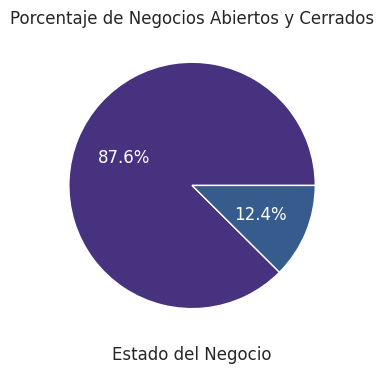

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))

# Distribución de negocios open-closed
count_open_closed = data['is_open'].value_counts()

labels = ['Abierto' ,'Cerrado']

# Configurar el tema de Seaborn
sns.set_palette("viridis")

# Configurar el color del texto
textprops = {'color': 'white'}

count_open_closed.plot.pie(autopct='%1.1f%%', labels=labels, textprops=textprops)

plt.title('Porcentaje de Negocios Abiertos y Cerrados')
plt.xlabel('Estado del Negocio')
plt.ylabel('')  
plt.show()




**Negocios con más reviews**

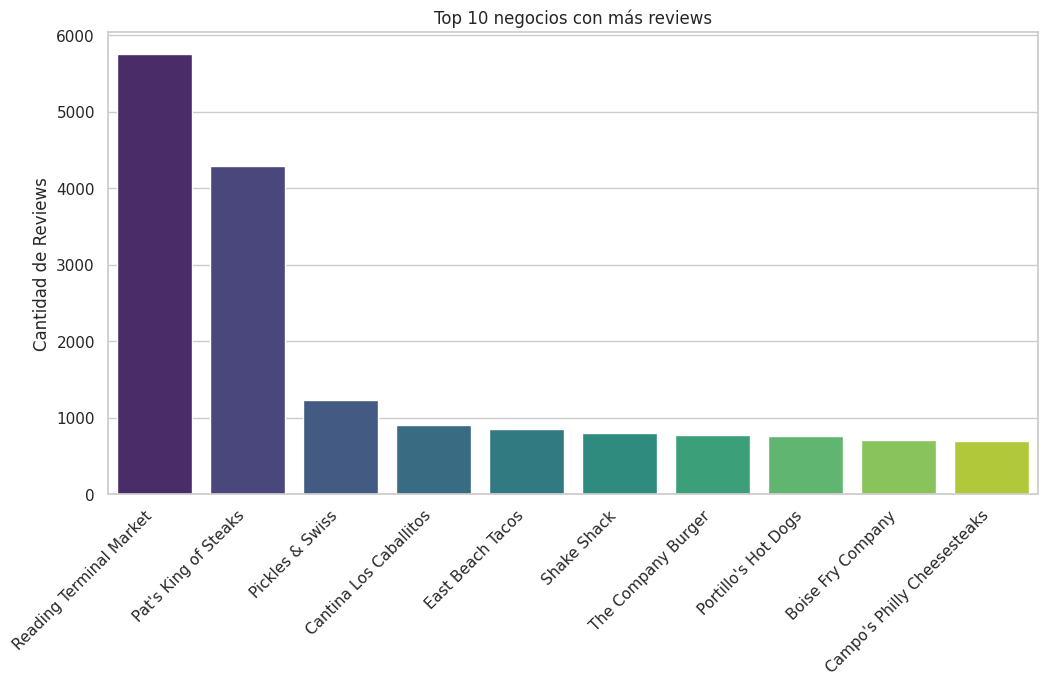

In [45]:
import pandas as pd
import matplotlib.pyplot as plt


business_reviews = data.groupby('business_id')['review_id'].count().reset_index(name='review_count')

top_businesses = business_reviews.sort_values(by='review_count', ascending=False).head(10)

top_businesses = pd.merge(top_businesses, data[['business_id', 'name_business']], on='business_id', how='left')

sns.set(style="whitegrid")

# Agregar valores de las barras

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name_business', y='review_count', data=top_businesses, palette="viridis")
bar_plot.set(xlabel='', ylabel='Cantidad de Reviews', title='Top 10 negocios con más reviews')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**top 10 usuario con mas reviews**

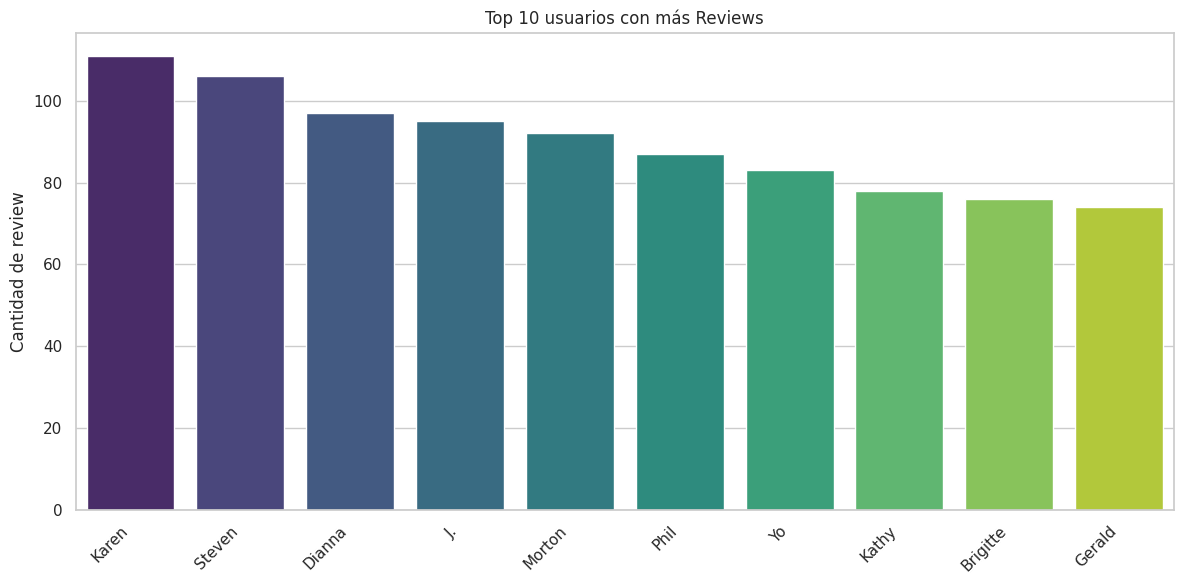

In [61]:

users_reviews = data.groupby('user_id')['review_id'].count().reset_index(name='review_count')

top_userses = users_reviews.sort_values(by='review_count', ascending=False).head(10)

top_userses = pd.merge(top_userses, data[['user_id', 'name_users']], on='user_id', how='left')


sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='name_users', y='review_count', data=top_userses, palette="viridis")
bar_plot.set(xlabel='', ylabel='Cantidad de review', title='Top 10 usuarios con más Reviews')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout() 
plt.show()

**Top 5 de negocios por reviews positivas y negativas**

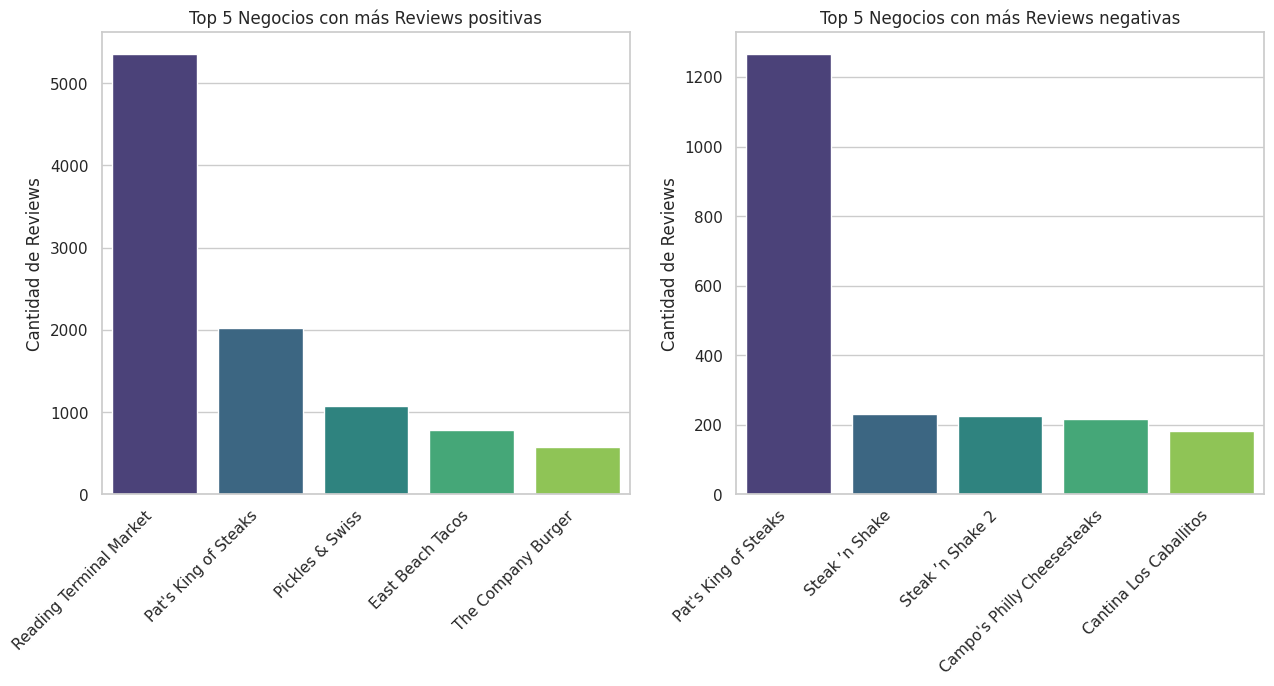

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## reviews positivas

positive_reviews = data[data['stars_business'] >= 4]

top_positive_businesses = positive_reviews.groupby('business_id')['review_id'].count().reset_index(name='positive_review_count')
top_positive_businesses = top_positive_businesses.sort_values(by='positive_review_count', ascending=False).head(5)
top_positive_businesses = pd.merge(top_positive_businesses, data[['business_id', 'name_business']], on='business_id', how='left')


### reviews negativas

negative_reviews = data[data['stars_business'] <= 2]

top_negative_businesses = negative_reviews.groupby('business_id')['review_id'].count().reset_index(name='negative_review_count')
top_negative_businesses = top_negative_businesses.sort_values(by='negative_review_count', ascending=False).head(5)
top_negative_businesses = pd.merge(top_negative_businesses, data[['business_id', 'name_business']], on='business_id', how='left')
top_negative_businesses.loc[top_negative_businesses['business_id'] == '5xW1QiUC2PEwa8jDha0scQ','name_business'] = 'Steak ’n Shake 2'

sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))


plt.subplot(1, 2, 1)
bar_plot_pos = sns.barplot(x='name_business', y='positive_review_count', data=top_positive_businesses, palette="viridis")
bar_plot_pos.set(xlabel='', ylabel='Cantidad de Reviews', title='Top 5 Negocios con más Reviews positivas')
bar_plot_pos.set_xticklabels(bar_plot_pos.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)
bar_plot_neg = sns.barplot(x='name_business', y='negative_review_count', data=top_negative_businesses, palette="viridis")
bar_plot_neg.set(xlabel='', ylabel='Cantidad de Reviews', title='Top 5 Negocios con más Reviews negativas')
bar_plot_neg.set_xticklabels(bar_plot_neg.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.show()

**Cantidad de usuarios por año**

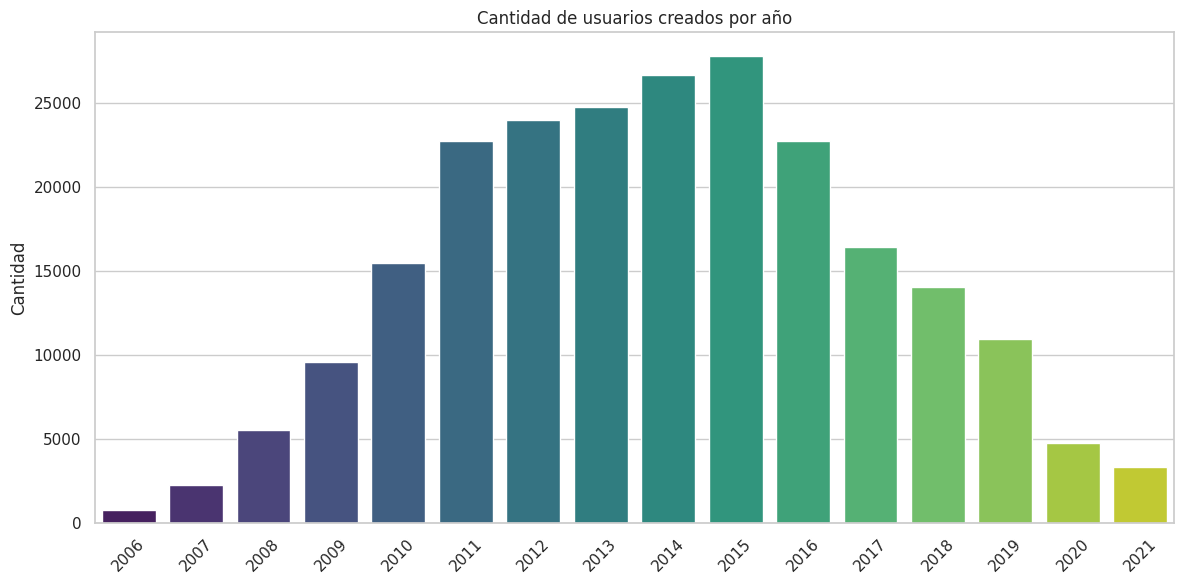

In [34]:
date_counts = data[data['date_create_user']>2005]['date_create_user'].value_counts().sort_index()


sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
sns.barplot(x=date_counts.index, y=date_counts.values, palette='viridis')
plt.title('Cantidad de usuarios creados por año')
plt.xlabel('')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


**Cantidad de reviews por año**

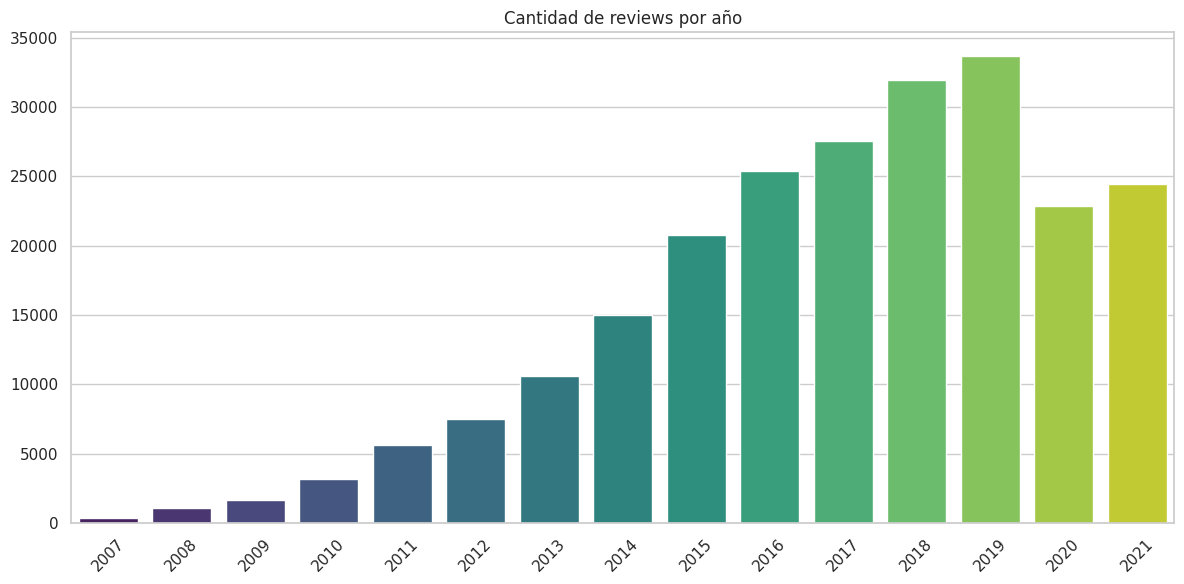

In [146]:
date_counts = data[data['año']>2006]['año'].value_counts().sort_index()


sns.set_style("whitegrid")

colors = sns.color_palette("viridis", len(date_counts))

plt.figure(figsize=(12, 6))
sns.barplot(x=date_counts.index, y=date_counts.values, palette=colors)
plt.title('Cantidad de reviews por año')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()
